In [2]:
pip install textblob

     |████████████████████████████████| 645kB 1.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import networkx as nx
import os
import re

from collections import Counter
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.simplefilter(action='ignore')


import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd 
pd.options.mode.chained_assignment = None
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib import style
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
import os
import re
from textblob import TextBlob

%matplotlib inline
plt.style.use("ggplot")

In [4]:
col_name = ["id", "date", "tweets", "c", "d"]
df = pd.read_csv("/Users/firlisaanggraeni/Documents/Semester 7 (YOK TERAKHIR YOK)/MK/Penambangan Data/Clustering/health_tweets.csv", names = col_name)
df.drop(columns=["c", "d"], inplace=True)
pd.set_option('display.float_format', '{:.0f}'.format)
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)
df.head(10)

id                            date  \
0 586266658731388928  Thu Apr 09 20:37:18 +0000 2015   
1 586260160462589952  Thu Apr 09 20:11:29 +0000 2015   
2 586238751334125568  Thu Apr 09 18:46:24 +0000 2015   
3 586181878635298816  Thu Apr 09 15:00:25 +0000 2015   
4 586159308745920512  Thu Apr 09 13:30:44 +0000 2015   
5 586159071264432128  Thu Apr 09 13:29:47 +0000 2015   
6 585917217696538624  Wed Apr 08 21:28:45 +0000 2015   
7 585878695568543744  Wed Apr 08 18:55:40 +0000 2015   
8 585878346556289024  Wed Apr 08 18:54:17 +0000 2015   
9 585850996666068992  Wed Apr 08 17:05:36 +0000 2015   

                                              tweets  
0  Tougher Vaccine Law In Calif. Clears First Hur...  
1  A new sort of extracurricular activity: seeing...  
2  Houston firefighters have another tool at thei...  
3  Will #Montana expand its #Medicaid program? So...  
4  Rand Paul's campaign first day: abortion and t...  
5  Enroll America, A Group Dedicated To Promoting...  
6  RT @LVGillespie: Ever look up #health #symptom...  
7  Patch-Up-Job? http://khne.ws/1NaiTex #Obamacar...  
8  Still getting your taxes done? Your 2014 tax b...  
9  In medicine and use a computer? You probably h...

In [5]:
text = []

for i in range(len(df)): 
  #menghapus beberapa karakter pada tweet menjadi string kosong " "
  clean_txt = " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(df["tweets"][i])).split()) 
  text.append(clean_txt)
  print(clean_txt)

Tougher Vaccine Law In Calif Clears First Hurdle
A new sort of extracurricular activity seeing patients
Houston firefighters have another tool at their disposal when answering calls digital doctors
Will Montana expand its Medicaid program Some moderates there have revived the idea
Rand Paul s campaign first day abortion and the budget
Enroll America A Group Dedicated To Promoting Health Law Sign Ups To Cut 100 Jobs
RT Ever look up health symptoms on a computer Retired news director led the charge
Patch Up Job Obamacare
Still getting your taxes done Your 2014 tax bill could be affected by your insurance
In medicine and use a computer You probably have this man to thank reports
RT Two doctors fight for their own choice of how to die Via
Still getting your taxes done Your 2014 tax bill could be affected by your insurance Watch
Battle For Mental Health Parity Produces Mixed Results
High Deductible Health Plans Can Ruin Finances
RT Maybe You Should Skip That Annual Physical
Billionaires Har

RT MI has enrolled gt 276K people in Medicaid since program expanded in April 320K signups were expected in year 1
ICYMI Study Medicare Could Save Billions On Rx Plans
Rape victims may have to pay for some medical services related to the assault
Waiting for your Medicaid coverage You may not be alone they may be 3 million of you
Double digit health insurance premium increases Could again be reality soon
New Medicare data Prices for most common inpatient stays in 2012
asks Wait wasn t the health law supposed to get rid of pre existing condition exclusions
Study If Medicare dumped random drug plan assignments it could save billions reports
Missouri s Declining Medicaid Caseload Stands Out In National Report
Sci fi Think again Doctors get advice from artificial intelligence reports
RT Artificial Intelligence Is Now Telling Doctors How to Treat You AI healthIT
Is a national health insurance exchange a possibility ACA Obamacare
DETAILS Sen Sanders releases plan to overhaul veterans health c

Seattle Hospital Sues State Over Exclusion From Exchange Plan Networks reports
Roundup Health Exchanges Grapple With Software Server Issues
profiles a Not So Young Invincible recently reformed
5 Things To Remember About Shopping On The Health Insurance Marketplaces
Data master joins forces with Appleby to dig into health law exchange cost data
Insurance brokers were worried Obamacare would put them out of biz now they re rethinking From
RT Need to interview someone injured after having robotic assisted laparoscopic surgery for story Contact marissae org
Insurers See Trickle Of Enrollees From Obamacare Exchanges
Are software dilemmas not just demand behind Obamacare Exchange problems
RT Coming up on Will obamacare insurance exchanges put brokers out of business cohealth ACA
Conspiracy Theory
What are you seeing out there on Day 3 of health insurance exchanges enrollment We want to know
Small Businesses May Find Relief In Health Insurance Exchanges Designed For Them reports
Back To Work 

Bipartisan Center Offers Plan To Reduce Health Spending 300B from Medicare reports
UnitedHealth Criticizes Medicare Rates Eyes Pruning Business reports
Beginning End Of Life Care At The Dinner Table continues her work at TEDMED
RT My blog on end of life session EOL TEDMED
Today s headlines Bipartisan Group Offers Budget Plan With 560 Billion In Health Care Savings
ICYMI Sen Baucus had some tough things to say to Sec Sebelius on the health law yesterday
Jonathan Bush Makes Case For Entrepreneurs In Health Care At TEDMED reports
Today s cartoon Down to the wire
The Medicare budget cuts no one likes
Our continues her work today tracking down the latest in health care Follow along as she live Tweets
Actuaries are forecasting the health law s costs but do their ties to insurance hurt their credibility
Report Health Law Tax Credit Could Benefit 26 Million reports
Today s headlines Arkansas Medicaid Expansion Gains State Legislators Final Approval
RT Just did some work at one of these treadmi

20 20 Hindsight Doc Who Sent Ebola Patient Home Says Care Was Appropriate
Ebola Czar to Return to Private Sector
Want an Easy Healthy Breakfast Try These 3 Recipes
Obama Visits Walter Reed Hospital For Sore Throat
Oxygen Therapy or Hot Air Treatment Doesn t Pass the Test
Oxygen Therapy or Hot Air Treatment Doesn t Pass the Test
Testing for an Incurable Disease Would You Want to Know
Use of Unproven Stem Cell Therapy Questioned
Is Technoference Hurting Your Relationship
This Season s Flu Vaccine Is Less Effective
Mutant Flu Do You Still Need a Vaccine
Y Quit Smoking Destroys Male Chromosome
Whooping Cough Epidemic Get Used to It
Why Bother Getting Flu Shot What You Need to Know
Dallas Spent 27K to Care for Ebola Nurse s Dog
Young Cancer Patients Benefit From More Teen Friendly Treatment Centers
CDC Warning Flu Viruses Mutate and Evade Current Vaccine
Unprecedented Drug May Help Heal Damaged Spines
Terminally Ill Basketball Player Signs Up for Hospice Care
Growth in U S Health Spending t

Health Insurers Obamacare Payment Rates Above 80 Percent
FEMA Unpacks Fully Operational Hospital In A Box
Faking Funny How to Tell Whether a Laugh Is Real
How Global Warming May Starve Us More Carbon Less Nutrition
Global Warming May Starve Us New Report Finds
Woman s Real Weight Loss Bikini Pic Goes Viral
Fungal Meningitis Victims to Get 100 Million Settlement
Fungal Meningitis Patients to Get 100 Million Settlement
Fungal Meningitis Patients to Receive 100 Million Settlement
Bystander CPR If Oregon Governor Can Do It Can You
U S Loses Ground in Reports on Motherhood
How to Stop MERS Gloves Masks and Goggles
Drawn by Children in Need Mom Helps Build Schools in Ethiopia
US Loses Ground in Reports on Motherhood
Safe to Eat Chemicals Banned in Other Countries but OK Here
Daughter Surprises Mom With 140 Pound Weight Loss Live on TODAY
US Uninsured Rate Falls to Lowest Point Since 2008
Disabled Children Get Custom Cars With A Purpose
Researcher Why Males are Invisible in Infertility
Classe

Dengue death a reminder that virus is in U S CDC says
Home birth as risky as not putting on child s seat belt researchers warn
Obama health care adviser Jennings leaving White House
Obama health care adviser Jennings leaving White House
Home birth as risky as not putting on child s seat belt researchers warn
Dengue death a reminder that virus is in U S CDC says
Foster Farms chicken plant opens after 10 day shutdown
No answers Jerky treats back in stores as pet mystery lingers
FDA checks into caramel coloring after Consumer Reports study
Are you binge working The question is deadly serious
Electrical burn causes star shaped cataracts in patient s eyes
Pet poisoning Jerky treats back in stores as mystery lingers
Texting while walking slows you down study shows
Scientists home in on good gut germs for weight loss health
Upside of your freezing office You may be burning more calories
Target to stop offering health care coverage for part time workers
Shopping cart danger 66 kids hurt a day 

Applying for health insurance Expect homework
My colleague Bill Dedman on The Daily Show last night talking about his fascinating new book Empty Mansions
Men need female hormone for sex drive fat control study
Tingly lips Why Sichuan peppers cause odd sensation
Deadly fungal disease detected outside the Pacific Northwest
Vegas mom gives birth to quintuplets
Jenna Wolfe s mother trip Tiny baby Harper brings big surprises
Opinion Gifts from patients raise thorny ethical issues
Prescription painkillers to get tougher warning labels
US cancer care in crisis experts say
FDA receives 89 reports of illness from yogurt
The Rice Diet tries for a comeback in low carb world
New Medicaid patients may be younger than states feared study finds
Aw nuts Nurturing dads have smaller testicles study shows
5 percent of US kids teens are severely obese
Graphic anti smoking ads helped 100 000 kick the habit for good CDC says
Mammogram wars Screen early report urges
15 patients in 3 states possibly exposed t

Surprise New specs may fix colorblindness
Bullies victims at risk for long term depression anxiety
Red state Medicaid expansion no shock
25 states to start testing new Medicaid models
More recalls of US made pet jerky treats FDA says
Flu vaccine barely worked in elderly this year
Feds indict 4 in salmonella outbreak
Women deluge hotline in probe of gynecologist
Why young smokers should quit before turning 44
Hold the fries We re eating less fast food
Docs list tests treatments you don t need
Stop calling yourself old says new study
Florida governor expands Medicaid
Scientists use 3 D printing to help grow an ear
Final health benefit rules clarify confusion
Teachers ditch student desk chairs for yoga balls
Federal research chimps savor retirement in new digs
FDA Don t use codeine in kids after tonsil surgery
Mosh pit movements are more orderly than you think
Hospital granted request no black nurses suit says
Drug overdose deaths up for 11th year
Feds will operate 26 health exchanges
Aft

VIDEO Ebola decline but not last epidemic
VIDEO Britons in denial about obesity
Planned NHS cash changes spark anger
Three e cigarette TV adverts banned
Ebola crisis likely to last a year
VIDEO GP Christmas closure patient advice
Smartphones changing our brains
VIDEO Healthcare workers Ebola battle
The west Africa you don t see
US childhood safer than in 1970s
Christmas closures plan ahead
Scientists attack student exit plan
VIDEO NHS Help elderly to ease A amp E pressure
Ebola vaccine promising in Africa
Tackle loneliness to shield A amp E
E readers damage sleep and health
VIDEO DNA project revolution in diagnosis
NHS to start era of DNA medicine
VIDEO Ambulance targets may help patients
Ambulance targets plan revealed
VIDEO Fixing bones with a household drill
First UK reservists join Ebola fight
Asthma inhalers not used properly
NHS to start era of DNA medicine
Ebola kills top Sierra Leone doctor
EU approves first stem cell therapy
Stem cell scandal scientist resigns
NHS staff to str

Fertility clinic used wrong sperm
NHS falling short on complaints
Major step towards Alzheimer s test
VIDEO GP prescriptions to tackle loneliness
Remote control contraceptive chip
VIDEO NHS had years of real financial squeeze
VIDEO Doctors missed my cancer 19 times
Suspected Ebola case hits Ghana
Experts in NHS funding debate call
Coping with my teenage chemo brain
PM s antibiotics plan not enough
Huge gaps in mental care for mums
Obesity and diabetes cost harms NHS
Obesity and diabetes cost harms NHS
VIDEO Diarrhoea treatment saves millions
Paying the price
AUDIO Hearing dog gave me confidence
VIDEO Africa collaborates to tackle Ebola
VIDEO Health regulator fails to get NHS
India to provide four free vaccines
African states agree Ebola strategy
Dying need free social care
Children s TV unhealthy food worry
Headbanging brain injury warning
Cancer care could be privatised
Decline in trials for Alzheimer s
Antibiotics CMO answers your questions
VIDEO Burnham and Poulter trade NHS statist

Arrest over alleged care home abuse
New care workers to earn certificate
Baby heart risk for pregnant smokers
Loneliness rising among elderly
Why the UK has a high child death rate
Heathrow flight Mers virus warning
Who What Why How dangerous are tick bites in the UK
Under fives death rate high in UK
Biggest scanning project begins
AUDIO Macmillan warn of cancer care crisis
VIDEO Fertility on a shoestring
VIDEO New tests in UK Biobank trial
Legal challenge over NHS spending
Pfizer raises AstraZeneca offer
VIDEO Cancer symptoms dismissed as IBS
Nursing home abuse report due
Whooping cough cases fall warning
Baby helmets have no added value
Mass tests to track risk of dementia
Inquiry call over nursing home abuse
Commons debates smear test age limit
Children copy parent screen habits
Legal high options open minister
Call for smear tests for under 25s
Many cannot afford a decent diet
VIDEO Tell tale signs of a mini stroke
Mini strokes should not be ignored
Pharma buyout threat to research

Women fare worse after strokes
VIDEO Smoking in cars What are the risks
Deaf children of our time
Why sharing data is for greater good
Health experts back car smoking ban
Power lines No child leukaemia risk
Measles global deaths decline by 78
AUDIO Charity defends pancreatic cancer ad
Birth order link to being overweight
Three fold increase in insulin use
Cancer envy campaign criticised
Temporary blindness boosts hearing
VIDEO Has Stafford scandal changed NHS
VIDEO US chain to halt tobacco sales
CBT effective in schizophrenia
Cash worries could harm NHS care
Hospitals to log victims of FGM
Bionic hand allows patient to feel
VIDEO Health warning on NHS spending cuts
VIDEO Teen told he would die beating odds
AUDIO Shivering could cause weight loss
VIDEO NHS in England getting better
NHS getting better says Hunt
New strain of deadly bird flu
Data reveals England s fattest areas
AUDIO Sons on caring for dad with dementia
AUDIO Nutt E cigs are a health advance
Bug shuts hospital wards to vi

Call to raise prescriptions to 10
Hospitals to publish staffing levels
Call to re use pacemakers abroad
Did Richard Nixon change the way people describe cancer
Is cycling getting more or less dangerous
VIDEO Pacemakers recycled to save lives
Care of brain injury victims poor
VIDEO Surrogates have positive experience
VIDEO How does the NHS plan for winter
GPs pressure from dental patients
Antibiotics are not for snot
UK doctors speak from Philippines
VIDEO PM will not lower age of consent
Home circumcision doctor to resign
VIDEO Asian bone marrow donors increase
PM will not lower age of consent
Face Ache The woman who lost teeth for nothing
VIDEO Bikers put the brakes on bad driving
VIDEO Medics may face jail for neglect
Irrelevant paperwork waste of time
Cancer diversity threatens drugs
Can robots care for the elderly
Medics may face jail for neglect
Climate clues as dengue fever spreads in US
VIDEO Frail patients to be given named GP
GMC welcomes Europe language rules
Bleach may heal 

Cancer Screening Not All It s Cracked Up to Be
Pizza days boost kids calorie and fat intake
Need a healthy push Turn to your partner to lose weight quit smoking
Saskatoon student banned from using medical marijuana at school
Dispensing danger Pharmacists fail to catch drug issues CBC s Marketplace finds
RT With this year s flu shot offering almost no protection there s a growing debate about the vaccine s hype
Guinea to reopen schools shut as Ebola precaution
Flu vaccine paradox adds to public health debate
Cancer survivor Dionne Warner thrilled by husband s 75 tonne gift
Hamilton researchers may have figured out how to beat the flu
Orange juice Is premium juice actually more natural
New measles cases tied to California Disney parks reported
Ebola new case numbers still alarming despite trend WHO says
Province s contract offer to doctors rejected OMA
New Ontario nursing exam administration worries Lakehead student
Patients contact RCMP about MS therapy researcher s credentials CBC lear

Ebola outbreak Travel bans irrational says Red Cross head
The facts behind Ebola If someone returns from west Africa with a fever or a cough do they have Ebola EbolaFacts
The facts behind Ebola Why can t we just send the vaccine to Africa EbolaFacts
The facts behind Ebola Do all Ebola victims bleed from the eyes and ears EbolaFacts
The facts behind Ebola Does contracting Ebola mean an automatic death sentence EbolaFacts
Ebola facts Join us at 8 p m ET for the truth about the virus
The facts behind Ebola Is the Ebola virus airborne EbolaFacts
ANALYSIS The blizzard of fear driving America s Ebola response Neil Macdonald EbolaFacts
Ebola outbreak What you need to know now EbolaFacts
Paralyzed man walks after cell transplant
Yellowknife woman s psychiatric report lands in employer s hands
RT Do health care workers have a duty to treat Ebola victims via Maureen Taylor s take
The facts behind Ebola If someone returns from west Africa with a fever or a cough do they have Ebola EbolaFacts
The 

RT Health Canada re Ebola vaccine Canada will be donating between 800 1 000 doses to the WHO Will keep a small supply
Canada offers experimental Ebola vaccine to West Africa
Ebola experimental drugs and vaccines in early days of testing
Leech sends man into anaphylactic shock
RT Basic public health is a better use of resources than experimental drugs We look at curbing the Ebola outbreak http
Liberia receives experimental Ebola drug as death toll tops 1 000
Claudette Menchenton offers free room for sick travellers
1 in 6 soldiers affected by mental health alcohol related issues
Unhealthy number of medical specialists in the north NOSM
Ebola drug test on Spanish priest highlights ethical questions
Ebola test negative for Brampton Ont man hospitalized after Nigeria trip
Australia couple says baby with Down syndrome not abandoned
Dying ALS patient lobbies Ottawa for financial aid
RT Brampton patient was found to test negative for Ebola virus disease says ON Health Minister Eric Hoskins Ou

Chinese medicine community split by language issue
Calgary students pee in cups for world record STI test attempt
Just follow your nose Trix trick shows cereal eyes grab you
E cigarette poisoning calls on the rise in U S
Changes to UNB nursing program in Moncton raises concerns
Supplement OxyElitePro recall reveals safety gaps
Ebola outbreak may have spread with 3 reported cases in Mali
Capital Health nurses strike ends
RT Any truth to the five second rule Not really depends where and what you drop say amp
5 second rule for dropped food put to the test
Elderly couple demand hospital end illegal detention
Epipen for addicts proposed to fight prescription drug problem
Family with 3 autistic children finds refuge in Yukon
Nunavut to bring tele psychiatry to remote communities
Medication mix up leaves cancer patient wife shocked
Steroids used in heart surgery harm patients McMaster study finds
Nurses with Capital Health go on legal strike
Ebola in Guinea puts miners in lock down
Labiaplast

Obesity prevention can start during pregnancy infancy
Mental health summit held at Fredericton middle school
Recalled defibrillators from Philips may fail FDA warns
Senator Rom o Dallaire in car crash on Parliament hill
The dangerous anonymity that helps drive online suicides
Britain accused of turning a blind eye to female genital mutilation
Grieving daughter says health care system failed her dad
Cancer drug Xeloda linked to severe skin reactions
E cigarette seller told to stop by Health Canada
STARS air ambulance flights suspended in Manitoba
Calgary senior s untreated bedsores spread to her bones
Healthy obesity a myth review finds
Diabetes hits earlier in First Nations kidney team finds
Pregnant woman with MERS gives birth by emergency C section
Parents file complaint about Shoppers drug switch
Having cancer is tough but it might be worse for my dad
Babies can try allergy provoking foods as early as 6 months
Cpl Ron Francis turns in RCMP serge after pot controversy
Aboriginal long

Glenn Close regrets ignorance of mental illness for hit role
AHS board dismissal shows model broken opposition says
Ontario workers exposed to unsafe levels of Agent Orange
N S mother calls for Yaz recall after daughter s death
U S Supreme Court rules human DNA cannot be patented
Coroner s Act needs overhaul lawyers group says
Quebec couple travelled to Switzerland so husband could die
Alberta health minister fires AHS board
Nova Scotia to fund sex reassignment surgery
Readers share 1st person Yaz Yasmin accounts
Search for MERS virus source needs global teamwork
Quebec tabling bill on medically assisted death
1 200 Canadians bought berry mix linked to hep A outbreak
1 in 6 women at fracture clinics have been abused study shows
Health wait times still fail to meet patient demands
Pain lecture for medical students downplayed harms
Yaz Yasmin birth control pills linked to 23 deaths
Independent robots may soon help in hospitals
Heart healthy diet may also help prostate
Ontario to boost ca

RT Well look at that The iPhone app makes an appearance at today s AppleLive event thisisCNN gothere
WhyIStayed shares her powerful domesticviolence story
12 states investigating enterovirus68 cases Here s what you need to know
As we all wait for Apple to release its new iphone here are 10 of the best apps to train your brain
Another Ebola patient is coming to in Atlanta this morning Here s what we know
The U S is not pandemic ready fed investigation finds the latest from
enterovirus68 cases confirmed in Missouri Illinois Colorado and Iowa
that is scary we d love to hear more pls email Jacque Wilson com
RT Our fear of dietary fat is melting writes diet weightloss
RT One dance class changed her life See her transformation amp how she danced off 127 lbs
Worried about the new virus sweeping the Midwest Here s what you need to know to keep your kids amp you healthy
Feel free to breathe deep in this Canadian metropolis CNN10
Residents in this city know how to live longer Learn their secrets

What are your tips for gardening if you have spring allergies CNNAllergies
RT Oops read your mind amp jumped the gun Hygiene hypothesis is definitely most prevalent
RT in most areas early mid morning amp lowest late in the day early evening amp windless days CNNAller
What time of day is pollen at its worst CNNAllergies
RT also some studies suggest early exposure to 2 or pets may reduce future allergies amp asthma CNNAllergies
RT what s good for you is bad for you amp vice versa Too clean first 1 2 yr of life is not beneficial for immu
RT rai Hygiene hypothesis There are fewer germs so immune system isn t fighting as
What do you think of the hygiene hypothesis idea that we have more allergies because we are cleaner CNNAllergies
RT rai global climate change is here to stay increasing pollen levels worldwide amp longer seasons CNN
Why have allergies been so much more common over the last couple decades asks rai CNNAllergies
RT some weak links btw ear infections amp nasal allergy but nothi

Report Ex NFLer s body exhumed for brain study
She lost 110 pounds in a little over the year so she could join the Army
5 cooking mistakes that pack on the pounds
No Mr Bond I expect you to drink New study says Bond imbibes too much
Someone else tech addiction making you nuts Here s help
Is affluenza real Or is it a way for coddled children and adolescents to evade consequences for their actions
Miley Cyrus says sex goes kaput after 40 Sorry Miley but research proves you wrong
Flu activity is increasing the CDC says vaccinations urged
New York City is requiring flu shots for kids under 5 in city preschools and day care Do your kids get the flu shot
IKEA recalling children s wall lamps after a child died
The FDA this week announced a plan to phase out use of certain antibiotics in food producing animals
Experts say Obamacare could help former inmates stay out of jail Is infrastructure in place to support those dreams
FDA wants to limit antibiotic use in livestock to reduce antibiotic re

Greenpeace Chinese herbs tainted with pesticides
Headed to beach this summer Better check this out
Health minute Summer foods for weight loss getfit
New sunscreen label language skincare health
This is your brain on food addiction
You don t die from dystonia but you want to
Why I pushed my wheelchair 3 300 miles helpRyanpush
What would YOU do in these tricky sexual situations
Meet DNA pioneer James Watson our LifesWork profile of the week sponsored by
RT Happy ff to a few of our favs
UK takes step toward three parent babies
FDA shuts down more than 1 600 online pharmacies
5 ways to kick your soda habit
Habits good or bad stick when you re stressed
questions the ethics behind the latest trend in cosmetic surgery for Asians
Fewer chimps to be used for medical research
School snacks are getting a makeover thanks to new rules
Sarah s breathing tube reinserted after lung transplant
5 ways to kick your soda habit
Dad I almost left my disabled daughter DownSyndrome
Headed to beach this summer

Today s getfit tip Never step foot in a grocery store again
5 things you should know about gluten
I will continue to fight until cancer gives up humanfactor
Obama seeks 100 million to unlock mysteries of the brain
Wine or your waistline It doesn t have to be an either or
No joke laughter is good for you
Worst U S cities for allergies
Today s getfit tip Eating more protein will not magically make you stronger To grow muscles put them to work
Fascinating Brain map seeks to unlock mysteries of the mind CNNIdeas
Congrats to iReportAwards nominees Sam Wessels amp Cliff Francoeur for their stories on autism amp depression Vote
Understanding the rise in ADHD diagnoses via
China report 4 more human cases of unusual strain of bird flu
Cancer patients in Canada got weak doses of chemo drugs
Pls ignore that last tweet wrong headline alert Government reverses plan to cut Medicare Advantage rate
The Fast Diet Fad or smart weight loss
Today s getfit tip Drink water at room temperature you ll drink m

Sandy destroys years of medical research
RT How cool is that athlete named one of the worlds fittest women by Congrats
Photos The world s fittest women
Highs and lows of using marijuana
Kuwaitis The world s fattest people
Here is your brain on art
Superfoods you should be eating
Heart problems are expensive
Sinusitis has different causes
RT CNNelection Arkansas says NO to medical marijuana Massachusetts says YES Colorado legalizes it regardless of use
More health woes for meningitis patients
RT Barack Obama will be re elected president CNN projects CNNelection
Shhh Some secrets may need keeping
RT healthcare was a major factor in my vote It s a major part of US spending amp should be a right of all
The world s fittest men of all time
Happy Election Day Did healthcare factor into your vote Tell us why or why not CNNelection
Amputee scales 103 floors with one of a kind bionic leg
The top 5 female fantasies via
Controversy surrounds fringe heart treatment
NYC Marathon runners find a way t

RT The future of heart treatment How StemCell research can improve the heart VID HealthTalk
RT A10 Better and less invasive treatments for those who have HeartDisease incld StemCells 1 focus needs to be on prevention healthtalk
Looks like we re out of time Thank you amp everyone who participated healthtalk
RT stylish I want to know if taking red wine when on anti hypertensive medications is dangerous HealthTalk
RT A10 Important to increase awareness of HeartDisease the risk factors healthtalk
RT We re a national leader in providing clinical best practices for all heartdisease pts HealthTalk
RT A4 people with high cholesterol have a greater chance of developing heart disease HealthTalk
Q10 What s on the horizon in heart disease treatment HealthTalk
RT A8 Quit smoking to reduce the risk 1 year after quitting risk of heart attack can be cut in half HealthTalk
RT LizWelch Check out these 10 fast and fun Heart facts from HealthTalk
RT A8 decreasing heart disease risk starts with managing ri

He s not in the mood These 7 surprising turnoffs may be to blame
6 superfoods you haven t tried
Attention Thin Mint fans The best and worst Girl Scout cookies for your diet
Every diet out there and which one is right for you
Women have been told some pretty crazy things regarding their health over the last century read them here
Hungover Too tired Your top exercise excuses busted
Everyday Health Daily Digest is out
The 7 best yoga poses to soothe back pain and feel great all day
Having the right food in reach is just one tip for weightloss
On the fence whether you should try P90X Let us help you decide
Some Complain of Shorter Penis After ProstateCancer Treatment
Food Is Love This Valentine s Day join EH amp to learn about foods that love you back Follow HealthTalk on 2 14 1 pm ET
Are you driving drowsy too
The best meat free protein sources
VitaminD Supplements Is What You See What You Get
ADHD Treatments Not Working for Most Young Children
Nerve Stimulation Cuts Down On Migraines
Sil

The best you can do is be there RT A7 Be there as a friend don t disappear listen Healthtalk
10 things that may be taking away from your good night s sleep
RT A6 Tell them calmly letting the facts be known Answer s then let them know what s next HealthTalk WorldCancerDay
Q7 How do you be a friend to someone with cancer HealthTalk WorldCancerDay
Good advice RT HealthTalk A6 With yourself and others be positive yet honest
RT Diet is profoundly important during cacner treatment You re so right HealthTalk
Q6 How do you talk with loved ones and children about your cancer HealthTalk
Q6 How do you talk with loved ones and children about your cancer HealthTalk WorldCancerDay
RT The food choices you make can help reduce your risk of cancer HealthTalk WorldCancerDay infographic
RT Great Q amp A taking place on HealthTalk with and Tune in for important tips WorldCancerDay
A5 Check out these alternative therapies for esophageal cancer healthtalk
RT A5 Alternative treatments to cancer are GREAT I d

What NOT to do when you re depressed
New Drug Slows the Progression of RheumatoidArthritis
The healthiest cooking oils to use in the kitchen
Swap rice for quinoa celery for red bell pepper More smart switches to make to boost your health
Just say NO to food cravings w this advice
How to reduce muscle soreness after a tough workout
10 fitness myths not to fall for
37 Percent of HipImplants Need Revision Within Five Years Says Company
Could you have spanx syndrome
The five distinct dietary patterns of Americans
The Gene Behind Psoriasis Identified
Everyday Health Daily Digest is out
Celebrate the holiday season with these 11 ways you can make a difference today
The Organized Caregiver End of Life Caregiving
Red meat and 6 more surprising foods that ll spike your blood sugar
Embarrassed by your psoriasis Chat w us tomorrow to discuss ways to live well w the condition joins us 2 pmET Follow HealthTalk
QUIZ How well do you know your heart
10 health symptoms men shouldn t ignore menshealth
F

The 9 worst ways to treat depression
Positive Results for New Diabetes Drug
Depression After Stroke May Boost Death Risk
Soda drinkers listen up Here are 7 reasons why you should kick the soda habit
Paula Deen s most gooey buttery and decadent recipes gone healthy
How much you smoke could put you at risk from dying from bladder cancer finds a new study
8 things that trigger restless legs syndrome
Before you dive into your lunch be sure to follow these healthy salad do s and don ts
9 foods to eat for a longer life
Why you should be eating more popcorn
Hey shows us how to get a bikini booty and it s not too late to start
The truth about zero calorie negative calorie foods
Here are some low cal and high protein snack ideas weightchat
Calling all teachers An om a day keeps teachers stress away
In the land of bad snack foods these guys make the hall of shame
The scary statistic of how many children will be obese by 2020 CutTheCaloriesAmerica
5 surprising foods that help you lose weight find

Women seeking happiness should ditch birth control pill doctor says
Chemo doesn t have to mean going bald anymore
NJ mom freezes eggs for her daughter
Women seeking happiness should ditch birth control pill doctor says
Screening men with ED for heart disease could save money lives
Trial of Tekmira s TKM Ebola treatment starts in Sierra Leone
Psychedelics not linked to mental disorders study finds
Report Specialty drugs drive prescription spending jump
Modified Mediterranean diets also good for weight loss
Parliament set to vote to ban branding on cigarette packs
Merck cancer drug is first approved under UK early access scheme
Record numbers sign up to Swiss right to die organization
Combination of stress and depression boosts risks for heart patients
Baby born with rare diagnosis He only has half of his heart via
Customers raise money to send Costco employee with terminal cancer on vacation
Genetic markers for PTSD linked to immune system response study says
How do people spread stress

Racial differences in breast cancer outcomes are partly biological
No sign of Ebola for CDC lab worker feared exposed weeks ago
Binge drinking kills thousands new study says
How men and women experience depression differently
Man in vegetative state for 12 years wakes up to tell remarkable story
Woman says cervical cancer was dismissed by doctors as growing pains
Sound mind and sound body This protein helps both
Optimism is good for your heart study finds
Rare disease leaves girl with half a kidney
Man who got a heart transplant within days celebrates new job new son
CDC director confident can get to zero Ebola cases
5 ways to get your diet back on track
Cancer survivors plagued by lack of personal control
Older diabetics may be pushing blood sugar too low
Napping is key to learning in early life study says
Replacement for BPA in plastics also suspect study says
China bans US poultry eggs imports amid avian flu fears
Michigan teen who had visit from dies of bone cancer
California links

From the archives NHS morale needs a dose of kindness nhs healthcare
The NHS has to provide face to face therapy to 95 of patients within 18 weeks but we can do better than this
Sign up for free to get our free newsletter every Weds straight to your inbox NHS healthcare
People with strong relationships are 50 more likely to survive life threatening illnesses research shows NHS
Are people with schizophrenia dangerous Screen representations falsely suggest so NHS
Prostate cancer nurses face extinction at a time when we re most needed ViewsfromtheNHSfrontline
Post reproductive health does not garner much attention in medical school or post registration training NHS
Technology enables us to radically improve access in a way traditional delivery methods do not NHS mentalhealth
What would you like to see us cover on the healthcare network Do send any ideas requests through to healthcare com
MT Human connection the basis of psychological healing is in abundant supply on internet a good read
T

What s a day in the life of a dermatologist like NHS healthcare
Popular this week Having Parkinson s since I was 13 has made me an expert in self care NHS
Don t miss s column on the Five Year Forward View this week NHS healthcare
Most read this week NHS morale needs a dose of kindness NHS ViewsfromtheNHSfrontline
We in the NHS may be battling low morale and high pressure but we should never forget the positive side of teamwork
What does the NHS Five Year Forward View need to survive healthcare NHS
What are the parties policies on the NHS Join our big health debate GeneralElection
Don t miss NHS Five Year Forward View will need support from clinical staff to succeed NHS
I faced a difficult choice become a GP or give up on a career in the NHS
Ever wondered what a dayinthelife of a dermatologist is like healthcare
Are you a member of our network It s quick free and easy to join
Don t miss patientfromhell on the flu crisis NHS
RT HIEC Chair why is there a shortage of dermatology consultant

Looking forward to our discussion on the A amp E crisis tomorrow Join us at 12pm And tweet us any questions GdnAandE
Popular on the network right now NHS to improve opportunities for black and minority ethnic staff NHS
RT world How can NHS employers and unions tackle the race equality challenge Our MD in
RT it will be interesting to follow your live expert discussion and hear some solutions on A amp E healthcare tomorro
RT see my article for Increasing pressure on GPs is root cause of A amp E crisis http
RT ex A amp E nurse am I on the road to burnout Ping This is awful burnout compassionate care
RT Morale boost a few minutes at the end of a shift to praise us on a matter that we handled well
RT Nurses are working so hard at the moment If I saw someone click at my colleague I d chew their balls off
RT A amp E nurse am I on the road to burnout and destruction Such an important question and no resour
RT I m hosting a live discussion for on the A amp E crisis tomo Do you have qu s for the

Our weekly roundup of news and views comes out tomorrow Sign up here to get it for free NHS healthcare
Popular today Amputees get new lease of life from pioneering prosthetics centre
Women and medical leadership infographics by via medwomen
RT Q from floor Do women sometimes pull the ladder up behind them Do they Don t men do this too Aren t we all just hum
Running a hospital is a far harder job than running a FTSE company says Hunt medwomen
RT ORiordan Not all women are soft fluffy good listeners We can be strong too just as men can be soft Please don t stereotype us b
Hunt proposes mentoring programmes for women who want to step forward to give them more self confidence medwomen
RT Rimmer Women are often better leaders and are often ego free say Hunt at medwomen
Hunt With 1 3m people in NHS we have good leaders but we don t bring them on Must tap into 70 of workforce that are women medwomen
Hunt we need to crack the issue of leadership in the NHS medwomen
RT Why is it so difficult fo

Election gives opportunity fr compact btwn NHS public abt amount of money health service shd get for next decade
RT Good piece the policy principle is correct but needs local collaboration and engagement for execution
More hospitals face A amp E crisis like Colchester via
How I did on Twitter this week 382 New Followers 128 Mentions 265K Mention Reach How d your week go via
A 10 year commitment on funding from the government would send powerful signals across the NHS
Culture of learning and improvement drew finance trainee Stephen Lowis to NHS management graduate scheme
RT Why I decided to join the NHS graduate training scheme good luck Stephen great
NAO report into the Better Care Fund shows government interference has done more harm than good
Just published RobW calls for a 10 year funding commitment for the NHS
How Basildon hospital was turned around with honesty and transparency
The majority of patients don t realise they have the right to see their medical records online NHS datam

Make over your libido with these tips for better than ever sex
If you re trying for a baby here s what you should know about the 10 things that can affect your guy s sperm
Having a tough time falling asleep See the 20 things you should NOT do before bed
Did you know baking soda can double as a beauty product See 12 creative beauty uses for this kitchen staple
Healthy eating made easy We ve got 7 super suppers you ll enjoy all week long gt
The hundred is a classic Pilates move that really works your abs shows you how it s done
Make your sweat sessions count Avoid the 10 cheats that blow your calorie burn
Perfect pairing See the 11 superfoods that are just better when eaten together gt
Get a flat belly in 4 weeks with this tummy toning routine
Feel better fast These 10 foods can help you fight back against colds allergies heartburn and more gt
Bread isn t the only source of whole grains Look to these 16 other options for more variety
Feeling parched If you re getting enough water these 1

RT 1 Do you like chocolate for breakfast TalkNutrition
RT Q4 Check out this post about why you may be exercising amp not losing weight TalkNutriti
RT Q4 The timing of food w exercise is also key I often see people eat too little before workouts amp too much afte
RT Q4 Overestimating how many calories you burned exercising amp thus eating more can cancel out weight loss result
RT Q4 I ve also seen many people overcompensate for exercise amp eat back as many or more calories than they burn
RT Q4 Eating too little w exercise can also lead to being less active during your non exercise hours due to fatig
RT Q4 Eating too little w exercise can mean not being able to workout as long or as hard which can affect result
RT Q4 The key to results is eating enough to fuel your body s basic needs more for exercise without overdoing i
RT Q4 Exercise combined with undereating can lead to the loss of muscle up injury risk and stall fat loss Talk
RT Q4 I often see people undereat and exercise a double w

The Surprising Way Your Healthy Eating Resolution Can Backfire
Hook up Apps Blamed for a Spike in STDs in the UK
How to Detox the Healthy Way via
Can Running Really Be a Form of Meditation by
4 Easy Snacks from The Biggest Loser s Jen Widerstrom
How I Learned to Accept and Love My Muscular Body by JenWiderstromforHealth
Learn the 20 top food sources for EVERY vitamin and mineral you need for a healthy life
How Having Accepting Friends Can Help You Lose Weight
The Exercise That Will Change Your Life and How to Conquer It by JenWiderstromforHealth
How 500 000 Dogs Are Helping a Teen With Cancer
The Best Foods to Help You Sculpt Muscle by JenWiderstromforHealth
How to Plan for Weight Loss Success by JenWiderstromforHealth
Amp up your workout with kettlebells Try adding these 5 beginner friendly moves to your routine
Get a 5 gift to spend on your furry friend when you purchase 1 of these premium pet foods
Start your day with a smoothie Try one of these 26 fresh new recipes
Be prepared 12 h

This Woman s Wedding Photos Gave Her a Weight Loss Wake Up Call by
Thanks To Q4 If you get overwhelmed by stress what are some breathing techniques you can do to relieve stress TalkYoga
RT Pay attention to your stance meditate on your feet grounding in to the earth Close your eyes and BREATHE
Very helpful Next question Q3 How can you meditate while you re in a long line to pay TalkYoga
RT great question Focus on deep full belly breaths or inhale through the nose exhale out the mouth a giant sigh
Thanks On to Q2 If you re stuck in traffic what are some ways you can calm yourself down TalkYoga
RT thanks for having me Meditation works by calming the parasympathetic nervous system amp focusing the mind Tal
Q1 How does meditation work TalkYoga
Hi everyone Thanks for joining to TalkYoga with We ll cover how to stay stress free this holiday season Let s get started
Don t forget to join us in 30 minutes to TalkYoga with She ll tell us how to stress less this season with yoga
You don t want to 

8 ways to boost your energy in an instant wellness
Forget crunches for flat abs Try these fat burning moves instead fitness
Fix your body s trouble spots with yoga
Period problems See why it s heavy erratic or missing altogether and what to do about it womenshealth
These are the 15 diseases doctors often get wrong wellness
Don t have time to wash your hair Get fresh clean hair in 5 minutes with these dry shampoo tricks beauty
JOIN US Tomorrow at 4 EST we ll be covering how to stay slim during the holidays with as we TalkYoga
Wave good bye to arm jiggle with these toning moves fitness
The Most Surprising Tool for Transforming Your Body by fitness fitspo motivation
There IS such a thing as healthy fried chicken See how to cut the calories healthyeating
5 Science Backed Reasons Why Music is Good for You wellness np
10 Celebrities Whose Hair We Want to Steal beauty
Dropping pounds doesn t have to be a chore Learn the 15 easiest ways to lose weight weightloss
3 Reasons Why Young Healthy Wom

Let your oven do all the work for dinner tonight 4 Delicious and Healthy Oven Roasted Recipes
Irregular heartbeat may speed memory loss with age atrialfibrillation
Head s up 49 sick in hepatitis A outbreak tied to frozen berry pomegranate mix foodpoisoning
It may be late spring but you can still suffer from allergies Do you best to prevent it with these 20 tips
RT Want to know the secret for strong and slim arms It s only a 5 min yoga routine Try it out
RT Forget your fitness gadget Whistle wants to track the activity of man s best friends
RT How to Prevent Headaches
RT Wine Beer and Spirits Could Get Nutrition Labels
We apologize Here s the link
Sorry about that Here you go
Lace up your shoes to celebrate National Running Day
More research needed but promising Stem cell therapy cures type 1 diabetes in mice
Love yoga Find an near you We can t wait for the one in NYC on June 9th
Think outside the bread box with these healthy bread recipes to make typical wheat or white bread pop with f

On a juicecleanse Try our fresh and simple juice and smoothie recipes made from whole fruits and vegetables detox
The good news Many cities now have cleaner air Not so good Others cities getting WORSE cleanair
Feeling the stress lately shares How To Break 5 Bad Stress Habits
Happy Wednesday What s for breakfast How about this filling Apple Oatmeal Did we mention it helps burn fat
Try this simple menu of delicious filling meal options that boost energy and trigger weight loss
Two hours of walking to burn off that burger Once you know it you re less likely to eat it diet
Have you seen our lovely May cover model Check our all her secrets to a healthy happy life
Here s how to cut brunch calories without feeling deprived Thanks
Have you been hit by allergies Beat itchy eyes sneezing and a runny nose with these round the clock fixes
These inspiring people lost weight sometimes 100 pounds or more with diet and exercise You can too
Mother s Day is right around the corner Start getting gift ide

The secret reason you re pigging out and what to do about it from RD
Think you need to do crunches to get flat abs Think again Here are 24 Fat Burning Exercises No Crunches fitness
Good morning Can t seem to wake up your eyes Try these Makeup Tips to Make Your Eyes Pop beauty
Omega Omega High protein heart healthy meals are on the menu Here are 20 SIMPLE DELICIOUS SALMON RECIPES
Is your sex life grand or bland Follow these Daily Tips for More Satisfying Sex
3 ways to feel happier this year is no sweat for cover star Hear how she tackles it all on her blog on
Renewing healthy choices every day is easy for She shares all in our Jan Feb issue
Want whiter teeth How about a lasting manicure New beauty tips from
Forget downloading that new song Try one of these Top Shape Up Apps fitness
Jan Feb cover star shares her rules for a fresh start in 2013 with Check out her story
Our guest blogger today is Get her dating and diet tips for a great 2013 here
Our Recipeoftheday is warm with a kick of s

5 Tips for Coping with Stress After Hurricane Sandy
Lupus May Be Linked to Serious Pregnancy Complication
Summer Babies Less Likely to Be CEOs Study Contends
Vegetables are a must on a diet I suggest carrot cake zucchini bread and pumpkin pie Jim Davis
Handshakes Matter for First Impressions Brain Study Confirms
Gene Tweaked Tomatoes Probiotics Aim to Lower Your Cholesterol
Recipe of the Day Chicken White Bean and Spinach Stew
6 Tips for Buying a Healthier Turkey
Common Antidepressants Too Risky During Pregnancy Researchers Say
U S Cuts Sugar Intake But Does it Matter
Junk Food Hurts Your Arteries But Healthy Meal Might Help
5 Workout Mantras That Are Bad for Your Body
Swimmer rejoice Water workout just as aerobic as land less wear and tear on body study says swim
For Many Superstorm Sandy Could Take Toll on Mental Health
Hypnosis may ease HotFlashes We heart naturalremedies
Why We All Need A Pre Diabetes Diet
3 Tasty Ways to Eat Spaghetti Squash
5 Sneaky Snacks That Are Making You Fat

Can we talk about eyebrows and how they thin out as you age These new products can do wonder
Hot yoga alert Omming in high temperatures can be bad for your health
There is more to life than increasing its speed Thanks for the great advice Gandi
If you re unemployed your health may suffer even if you have insurance Why do you think this is
Don t hide scaly skin this season You can enjoy silk smooth skin all winter long
Dr Oz shares his 10 tips for getting your family healthy
Remember your New Year s resolution to get fit Try one of these amazing classes to kickstart your workout
Could your medication be giving you heartburn
You know how everyone s scrambling to get a flu shot Maybe what more of us really need is a Hep B
Are you trying to get more calcium and Vitamin D in your diet but don t want to drink milk all day Try these recipe ideas
This is sad some economically disadvantaged families stretch their baby formula This can t be safe for babies
The best diet out there might be one yo

Tossing and turning Why it may be hurting your marriage
Blogger shares her favorite reads RT Check out these 4 Inspirational Weight Loss Blogs
Fitness Inspiration When I was 20 and Dad was 48 we began a tradition A 10 miler FathersDay
stevenson We recommend 1 to 2 lbs for beginners in this super fun workout 3 lbs is OK after a little practice
Magic Yoga Move Look beautiful from behind with this bum sculpting series from our resident yoga guru mcgee
stevenson you re welcome If you re still curious check out this link We compared 10 different sweeteners
stevenson Agave is a less processed sweetener 1 tbsp has 60 cals but it s sweeter than sugar so you ll probably use less
In a hurry and hungry Here s what to eat to stay slim on the go courtesy of our
Sounds amazing RT These no bake banana chocolate almond squares are a great healthyrecipe
Recipe of the day
Enjoy summer strawberries straight out of the carton or in shortcakes pies and more of these healthy recipes
15 healthy eating tips f

ICYMI MT L A County to docs Report measles immediately amid rise in cases
RT The anti vaccination movement brings measles home to California your state could be next
Who does a better job sitting still in an MRI scanner humans or these guys
Sedentary behavior leads to disability in the 60 crowd study finds suggests stand up bingo
Cancer screening expert tells radiologists to stop acting like politicians and start acting like scientists
Thanks for these glutenfree ideas
Stop with the instant messages and emails Get up Study says so
Have you suspected that stress makes your headaches worse Especially migraines New study says you were right
About 70 of breast cancer tumors are fueled by estrogen New test suggests Paxil prompts body to make more of it
New test from suggests Paxil treatment for depression and hot flashes may promote breast cancer
LATFit done and DONE RT Boom LATFit hiking Runyon Canyon Park la
Another reason to appreciate wine Grape vines have rendered harmless a bacterium 

How do you feel about using genetic info collected by 23andMe to help parents design babies with certain traits
Americans love Obamacare as long as you don t call it by name LAT s explains
C section isn t always necessary for a safe twin birth Huge study shows planned vaginal birth just as safe
Exercise is just as good or better than drugs for treating heart disease and stroke Cheaper too latest
Spend time in the ICU and get a sad parting gift cognitive problems It happens to 2 3rds of patients From
Do you live near a busy road exposed to higher levels of car exhaust There s a 1 in 5 chance the answer is yes
Put those ZZZZZs to work Scientists are trying to manipulate your memories as you sleep to make them less scary
RT Lots of demand amp complications for Obamacare in Calif Tuesday Discuss w amp at 9 a m
Amid global war on drugs prices for heroin cocaine and marijuana fall Purity and potency rise
If you want to live for a long time thank the scientists who study the naked mole rat
RT

RT Slim in 6 amp Slim in 6 Pack exercise LATFit
As u inspire us MRT qsi We all give more in presence of others Couldn t have hit 100 wall balls w o em LATFit Crossfit
Getting an LATFit start to the weekend MRT walked 3 Pigs Runyon
Boxer Wladimir Klitschko on training diet and sibling rivalry
Julie Weiss reaches goal of 52 marathons in 1 year
Anger issue When phone goes from mobile to aerial
Follow the winding path at Elysian Park
Top new workout DVDs
FDA aims to change the way it monitors safety of defibrillators
Warning Excessive tea drinking can be hazardous to your health
Another nationwide recall of compounded medication
Dr Oz insomnia remedy results in third degree burns viewer says
New guidelines Labs should report accidental genetic disease risk
Pediatricians group gay marriage fosters child health
La Preferida voluntarily recalls canned pinto beans FDA says
Undisclosed soy prompts voluntary recall FDA says
Engineered T cell therapy offers hope to adult leukemia patients
Patient

L A Affairs Beyond a love for Africa he shared little
Booming medical school brings life to downtown Pomona
Obama respects Supreme Court s power attorney general writes
Aetna rate hike is deemed excessive by California regulator
When a health insurer won t pay for an ER visit
Cancer diagnosis raises risk of heart attack and suicide study says
Prosthetics get the personal touch
Obama s Supreme Court comments off the mark
Study identifies genes linked to post traumatic stress disorder
Study on kids playtime with parents Does it miss the point
We may be fatter than we think researchers report
Supreme Court needn t fear healthcare law s individual mandate provision
Reliance on BMI understates the true obesity crisis experts say
HIV among black women in 6 cities far exceeds national average
Officials ponder how to ensure healthcare reform in California
On losing a piece of Hollywood history debating The Hunger Games and reading and controlling Medicare costs
The bizarre calculus of emergenc

New Clues to the Evolution of the Human Brain
Why You Overeat Even When You re Full
Migraines More Likely for People With Celiac Disease Study Says
Blond Genes May Vary Around the World
More Teen Girls Using Contraceptives CDC
New Guidelines Issued for Severe Lupus
Hot Flashes More Likely for Certain Smokers Study Says
Researchers Rejuvenate Blood Forming Stem Cells in Mice
U S Health Care Spending High But Quality Lags Report
Many Breast Cancer Patients in Their 40s Aren t High Risk Study
Antipsychotics Do Help Many With Schizophrenia Study Finds
Overly Long Pregnancies Linked to Behavioral Problems in Toddlers
Lower Dose Radioiodine Effective Against Thyroid Cancer
Who s the Dad First Trimester Blood Test May Tell
Less Invasive Heart Valve Replacement Works for Elderly Study
Aspirin as Effective as Warfarin for Heart Failure Study
Dengue Fever a Major Cost Burden in Puerto Rico
Eating More Foods Rich in Omega 3s May Lower Alzheimer s Risk Study
Iceman Mummy Yields Oldest Human Blood 

Screening Moms to Be for Thyroid Trouble May Not Help Offspring
Experts Warn of Antibiotic Resistant Gonorrhea
Electrical Brain Stimulation May Strengthen Memory Study Says
Tai Chi May Help Parkinson s Patients
More Success With Gene Therapy for Blindness
Depressed Kids May Be Targets for Bullying Study Suggests
Fasting Plus Chemo May Help in Cancer Fight Study
Big Drop in Americans Blood Level of Trans Fats CDC Says
Female Soccer Players May Face Health Problems Study
Short Breaks During Exercise OK for Diabetes Control Study
One Silver Lining to Recession Fewer Broken Bones
Playing Sports May Help Keep Kids From Smoking
Quality Day Care Predicts Later Parental Involvement in School
12 Ways to Never Get Diabetes
12 Simple Ways to Ward Off Cancer
A Diet Cure for Canker Sores
Thousands of U S Kids Hospitalized for Abuse
Best Nursing Homes The 2012 U S News Honor Roll
New Antibiotic for Bladder Infection Disappoints in Trial
Risk of Death From Certain Breast Cancers May Rise With Age
Kid

Shock Fear May Curb Sex for People With Heart Devices
Shot Might One Day Help Lower Cholesterol
More Teens Getting Vaccines Against HPV Other Infections CDC
Childhood Aggression May Predict Health Woes in Adulthood
Poor Sleep May Lead to Fibromyalgia in Women
More Heart Attack Patients Take Meds When They Are Free
Exposure to Toxic Solvents Linked to Parkinson s Disease
Sepsis Plus Heart Rhythm Disorder Linked to Stroke Death
Study Suggests Exercise May Help Memory of Fibromyalgia Patients
Too Few Doctors Screen Young Athletes for Hidden Heart Trouble
Sugar Sweetened Drinks May Pose Heart Risks to Women Study Suggests
Abused Girls at Greater Risk for Heart Disease as Adults Study
Regular Teeth Cleanings Could Cut Heart Attack Risk Study
Blood Thinner Xarelto Shows Promise for Heart Patients
Babies Put on Transplant List Before Birth Get Hearts Faster
Intensive Control of Type 1 Diabetes Helps Kidneys Study
Can Facial Flaws Cost You the Job
After Brain Injury Oxygen Monitoring Vital Stu

Smoking Might Raise Sex Hormone Levels After Menopause
Helpful Gut Microbes May Differ Based on Diet
Research Reveals Why Blacks More Prone to Kidney Failure
Babies Born With Heart Disease Often Harmed by Gut Bacteria
As Venus Williams Bows Out of U S Open Little Known Disease Takes Center Court
Scientists Use Stem Cells for Blood Self Transfusion
Heart Disease May Pose Problems in Orthopedic Surgery Patients
FDA Silicone Breast Implants to Remain on Market
Mouse Study Could Give New Clues to Fighting Baldness
Strokes Rising Among Teens Young Adults CDC
Last Year s Flu Shot Won t Protect Kids This Season
Greater Exercise Intensity May Add Years to Life
Potatoes May Be Good for the Heart After All Study Says
Longer CPR Backfires for Certain Heart Patients Study
Electronic Medical Records Might Boost Diabetes Care
Dangerous Bacteria Hide Out in Nurses Doctors Uniforms
Some Older Breast Cancer Patients Can Skip Hormone Therapy Study
Kids Carrying MRSA Germ Prone to Serious Infection Study

House Calls Keep People Out Of Nursing Homes And Save Money
California Experiments With Fast Tracking Medical School
When And How To Die Germany Debates Whose Choice It Is
NPR RSS Error
Do You Want To Be Happy Don t Set Your Expectations Too High
Truth In Gluten Free Labeling Celiac Community Cheers FDA Rule
As Ebola Spreads in Nigeria Debate About Experimental Drugs Grows
From Surgeon General To Smoking Foe Remembering Dr Steinfeld
Plotting The American Role In Fighting The AIDS Epidemic
Brief Counseling May Not Help With Most Drug Problems
Skeptics In Sierra Leone Doubt Ebola Virus Exists
Suspicious Use Of AIDS Drugs Costs Medicare 50 Million
Liberians In America Help Dispel Ebola Myths Back Home
Numbers Of Americans With Health Plans Way Up But States Vary
The Ebola Outbreak A Dress Rehearsal For The Next Big One
U S Sees A Spike In Number Of Insured But It Depends On The State
Ebola Photographer Introduces The West To Outbreak s Victims
Health Law Calls For Automatic Enrollment For

Sharp Rise In MERS Cases May Mean The Virus Is Evolving
Powdered Liquor Now Legal But Won t Be In Your Margarita Soon
Robotic Exoskeleton Helps Get Vets Back On Their Feet
Tennessee Bill Could Send Addicted Moms To Jail
Tennessee Bill Could Send Addicted Moms To Jail
Lead Poisoning Nightmare In Nigeria May Be Easing
Hunger Games College Athletes Make Play For Collective Bargaining
For The Children s Sake Put Down That Smartphone
Scribes Are Back Helping Doctors Tackle Electronic Medical Records
Heroin Recovery And Redemption Where You d Least Expect It
Extra Vaccination Push Underway In Ohio As Mumps Outbreak Spreads
Polio Threatens To Spread Through Central Africa
Mental And Physical Toll Of Bullying Persists For Decades
Fake Morning After Pills Found In Peru May Hint At Bigger Problem
One Scientist s Quest To Vanquish Epileptic Seizures
Pot Smoke And Mirrors Vaporizer Pens Hide Marijuana Use
Why Mumps And Measles Can Spread Even When We re Vaccinated
Updated Obamacare Enrollment Exce

Clinton To Obama Honor Promise That People Can Keep Coverage
Do For Profit Schools Give Poor Kenyans A Real Choice
Trans Fat Ban Could Bring Smaller Waistlines But At What Cost
Despite Health Law Uninsured Rely On Prevention Care Patchwork
WHO Rates Typhoon s Medical Challenges Monumental
Brain Scans Shouldn t Get Their Day In Court Scientists Say
WHO Rates Typhoon s Medical Challenges Monumental
The First Estimate On Insurance Signups Is Pretty Darned Small
Aid Groups Struggle To Reach Survivors Of Typhoon Haiyan
4 2 Billion Deal Highlights Drug Profits From Rare Diseases
Movies Rated PG 13 Feature The Most Gun Violence
Oh the internships starting in January are paid Forgot to mention that in original tweet
is looking for editorial and multimedia interns starting in Jan Apply now Deadline Fri 11 15
Sweat Your Way To A Healthier Brain
Self Employed And With Lots Of Questions About Health Care
Lighting Up The Investigative Path With Polonium 210
Why Can t Ted Stay Out Of The Emergency R

When Treating Abnormal Breast Cells Sometimes Less Is More
Worms Bright Blue Death Could Shed Light On Human Aging
FDA Infected Lettuce At U S Restaurants Traced To Mexico
Congress May Be Getting Its Own Obamacare Glitch Fixed
Could Hotter Temperatures From Climate Change Boost Violence
That Face Lift May Buy You Only Three Years Of Youth
Reexamining the Definition of Cancer
FDA Approves Gluten Free Label
Is Uruguay s Marijuana Legalization Vote A Tipping Point
Penn State To Penalize Workers Who Refuse Health Screenings
Acetaminophen Can Cause Rare Serious Skin Disorders FDA Warns
Victims Of Bullying Are More Likely To Be Arrested As Adults
What Outbreak Students Tune Out Tweeted Health Warnings
Want To Be A Morning Person Take A Few Tips From Campers
When Fleeing Zombies Or Flu Cooperation Saves Lives
Tampon Marketing Gets Real For The Social Media Age
Potential Treatment For Snakebites Leads To A Paralyzing Test
Nurse Charged With Assisting In Her Father s Death
Decades Later Drugs D

Businesses Sue Government Over Birth Control Mandate
Despite Billions In Aid Many Haitians Still Live In Squalid Camps
In The Battle Between Health And Taste Why White Bread Still Wins
CDC Says Flu Waning In Places But Worst May Not Be Over
Getting A Handle On Why Fingers Wrinkle
Using Genetics to Target Cancer s Achilles Heel
Pap Test May Detect More Than Just Cervical Cancer
The Buzz On Silent Retreats
How Military Research On Anthrax Could Lead To A Weapon Against Gluten
Merck Halts Sale Of Niacin Drug In 40 Countries
Feeling Miserable You re Not Alone And The Flu Epidemic Has Yet To Peak
Haiti Then And Now 3 Years After The Earthquake
Black Market Pharmacies And The Big Business of Spam
Speaking More Than One Language Could Prevent Alzheimer s
Families And Fat What Can Help What Can Hurt
Wake Up Call FDA Pushes Drugmakers To Weaken Sleeping Pills
As Cases Spike Flu Season May Be Peaking In Boston
Artist s State Shaped Steaks Explore Beef s Origins
U S Ranks Below 16 Other Rich Coun

Experts Oppose Ebola Travel Ban Saying It Would Cut Off Worst Hit Countries
Amid Assurances on Ebola Obama Is Said to Seethe
In Europe Fear of Ebola Far Outweighs the True Risks
Waste From Ebola Poses Challenge to Hospitals
Well Ask Well Do Mosquitoes Spread Ebola
Well Ask Well Do Mosquitos Spread Ebola
RT Staff in Texas Ebola Case Is Asked to Avoid Public Spaces
You may be younger than someone with less years
Well Mistakes in Treating Childhood Fractures
WHO says Senegal is Ebola free
RT span Being Mortal new book from Gawande wise important beautifully written a bit late to the party
A child s backpack should not exceed what percent of body weight Take this week s quiz by
The New Old Age Blog A Doctor Discovers Dying
Health Worker Who May Have Had Contact With Ebola Is on Cruise Ship
When nurses were encouraged to monitor doctors practices at first there was tension then useful changes
RT Get the facts about Ebola Here s what you need to know about when a person can spread the diseas

A study found that compared with those who skipped breakfast those who ate a morning meal take the weekly quiz
Before you grab that spray on sunscreen today here s what you should know
World Briefing Ghana Cholera Outbreak Kills Dozens
Two New Cases of Ebola Stem From Indirect Contact
National Briefing
Blood Industry Shrinks as Transfusions Decline
Administration Proposes New Health Rules Addressing Religious Objections
CrossFit doesn t just transform bodies it changes the way people think of themselves
Vegetarian taco night doesn t have to mean beans and lettuce
RT Can a better hospital room actually make you feel better This is fascinating
Not even the Food and Drug Administration knows if spray on sunscreen is safe
Well Growth Hormone for Children May Increase Stroke Risk
Well Vegetarian Taco Night
RT What is Crossfit anyhow
Weekly consumption of fish was associated with larger gray matter in the brain but not because of omega 3 content
Eat some fish this weekend Research suggests t

Early Results Arrive on Weight Loss Pills That Expand in the Stomach
Advertising A Brand Highlights Its Natural Bona Fides and Taste
At School Turning Good Food Into Perfectly Good Compost
Judge Upholds Policy Barring Unvaccinated Students During Illnesses
Seeing Sons Violent Potential but Finding Little Help or Hope
Dr Arnold Relman Outspoken Medical Editor Dies at 91
The New Old Age Blog You Can Do It Shirley
New some new recipes for broccoli Here are five healthy ones that help you use the entire stalk
Health Site Is Changing Supervision
Uruguayan Player s Return After Head Injury Stirs Debate
RT NY Senate Passes Bill on Medical Marijuana
You asked we answered Is only working out on the weekends better than never working out at all askwell
Well Broccoli Stems and All
RT Shld states have laws on maternal mental illness These states do NY legislature just passed 1 will governor sign http
RT New York Leaders Reach Deal on Medical Marijuana
RT CDC may have exposed 75 scientists to anthr

Well The Hospital Dependent Patient
Can you Think Like a Doctor What s wrong with this young man who has episodes of aggressive manic behavior
F D A Approves Portable Drug Overdose Treatment
RT span Caregivers Go take a hike It might help
New York Program to Help Police Get a Kit to Combat Overdoses
Well Think Like a Doctor Running in Circles
Psychologist Helps Huskies Forge Lasting Bonds
Business Briefing Medicare to Share Information on Pay for Physicians
Texas Abortion Providers to File Suit Against Restrictive Law
Texas Abortion Providers to File Suit Against Restrictive Law
Mental Health Groups Split on Bill to Revamp Care
The New Old Age Blog Walking the Talk
Well How Exercise Can Help You Live Longer
Ebola Reaches Guinean Capital Stirring Fears
Well Low Vitamin D Levels Linked to Disease in Two Big Studies
How do probiotic bacteria survive the stomach s acid bath
RT A million preterm babies die each yr We can make major strides in decreasing that w smoking bans
What can dogs tel

Well Tonics and Teas
Quiz Can you guess which individual from a set of identical twins is the smoker
RT What is brain death amp explain
Well Ask Well Is Jogging Bad for Older People
Polio in Syria Is Said to Be Under Control
Why do some patients send letters to the doctor after a loved one s death
The Science Behind Brain Death
RT A different way to deal with sleep apnea Story by
Well Letters to the Doctor
How do short track speedskaters train to build endurance and strength in their legs finds out
RT McNeil lays out short fascinating history of cholera based on new genes from 1849
RT May be surgical alt treatment for sleep apnea but no control group in small study So still early days
Well The Workout Speedskating With Eddy Alvarez
Food Companies Have Cut Back on Calories Study Says
Bird Flu Cited by Officials in Death of Canadian
With Help of Victims From 1849 Scientists Decode Early Strain of Cholera
Well For Sleep Apnea Patients a Possible Alternative to Masks
Did the recent recessi

Well Think Like a Doctor A Green Heart
Millions of Poor Are Left Uncovered by Health Law
A 76 year old has a green heart Can you figure out why Tune into at 12 00AM ET for the latest Think Like a Doctor
In Practice Problems at Health Care Web Site Not From Online Attack Experts Say
Well Depression Tied to Parkinson s Risk
Well Statins May Reduce Gum Disease Risk
The New Old Age Blog The Icing on the Cake
Think less to get fit Research shows that exercise feels harder when your brain is tired
Watch s Life Interrupted videos winner of a for New Approaches Arts Lifestyle amp Culture
Beautiful RT Eating Purple 5 ways for eating eggplant from
Well Ah There s Nothing Like New Baby Smell
Well How Intense Study May Harm Our Workouts
RT How to really get that youthful glow
Is soy safe to eat
RT Important story by Breast Feeding Services Lag the Law
What products can give you a youthful glow Tricks and tips from Jane Brody to keep you looking young
Well Breast Feeding Services Lag the Law
RT Lac

Supreme Court Rules Human Genes May Not Be Patented
Isolated human genes may not be patented the Supreme Court ruled unanimously on Thursday
Well Breast Milk Is Good for the Brain Scans Show
The New Old Age Medicare to Pay Less for Diabetes Care Supplies
Slideshow How cities are making biking safer for everyone
Well An Up Outlook Can Improve Our Health
Well Bike Sharing Can Mean Safer Biking
National Briefing
Federal Plan for Morning After Pill s Sale Is Approved
House Panel Advances Bill To Restrict Abortions
E Cigarettes Are in Vogue and at a Crossroads
Did you wash your hands properly after you used the toilet Don t lie We all know you probably didn t
What Happens to Women Who Are Denied Abortions
Pill Prevents H I V Among Drug Addicts in a Study
Drug injecting addicts who took a daily antiretroviral pill were half as likely to become infected with H I V
Well Hearing Loss Takes a Health Toll
The New Old Age Blog When Hearing Aids Won t Do
Do you use FitBit or another fitness tracker

Genfit to conduct large liver drug trial despite setback
U S ad campaign points to dangers of dual cigarette e cig use
Midlife fitness may lower risk of some cancers later
U S Ebola patient s condition improved to serious NIH
Morphosys Celgene end cooperation on MOR202 drug candidate
U S House approves bipartisan fix to Medicare doctors pay
Post election unrest could hamper aid efforts in Nigeria
Indiana governor allows needle exchange to fight HIV outbreak
New pandemic insurance to prevent crises through early payouts
Sweden s Medivir in partner talks for drug candidate MIV 802
With diabetic nerve damage walking can pose fall risk
WHO urges Europeans to work together to counter high drug prices
Conatus Pharma s liver drug succeeds in mid stage study
Stada agrees oncology deal with Indian Hetero Drugs
Actelion says wins Japanese approval for heart and lung drug
Employer incentives for U S worker wellness programs set record
Cholera will plague Haiti until water sanitation crisis solved

Second British health worker tested for Ebola in London
International campaigners urge UK to allow 3 parent IVF babies
Antibiotics firm Motif Bio to tap UK market for cash
In pursuit of next generation Ebola stockpile vaccines
China to tackle food safety as policy priority Xinhua
British health worker being tested for Ebola after needle injury
More than 100 cases of measles now confirmed in U S
Second California patient tests negative for Ebola hours after first
Chimerix to stop participation in clinical studies of Ebola drug
Ex Super Bowl champ Leonard Marshall to teach about concussions
Heavy kids can have celiac disease too
FDA approves Shire s Vyvanse for binge eating disorder
Second patient hospitalized in California undergoes Ebola testing
White House urges parents to heed advice urging childhood vaccines
Computer tracks eye movements to detect concussions
Athletes biological clocks affect their performance
Gates Foundation awards 50 million to Stanford vaccine discovery
Sun Phar

UN nuclear agency says helps Sierra Leone fight Ebola
Minimalist running shoes tread lightly more naturally experts say
Philippines to isolate returning peacekeepers for Ebola checks worries about public reaction
Laundry detergent pods pose serious risk to young kids
China criminal gang floods market with 100 metric tons of toxic tofu
Merck four week hep C regimen with Gilead s Sovaldi comes up short
After hepatitis C cure companies target next big liver disease market
Nurse who fought Maine Ebola quarantine moving out of state report
Liberia rights commission calls for compensation for Ebola quarantine shooting
Ebola death toll rises to 4 950 WHO
Dallas marks Ebola end with relief selfies with President Bush
U S OKs genetically modified potato with lower cancer risk
Insurance income education tied to survival after lung cancer surgery
Scientist hopes to unlock Ebola s secrets at outbreak s source
Taping feet to prevent blisters on runs may require nuance
Cognitive therapy mindfulness 

RT MINUTES AWAY White House briefing on Ebola LIVE
E coli detected for the second time in water supply near Seattle
Patients tend to listen more to female doctors
DOT spokesman confirms it has issued special waste management permit for Texas hospital caring for Ebola patient
How gaps in data are hindering the fight against Ebola
Low cost home fixes may prevent falls
Many U S nurses say they are unprepared to handle Ebola patients
Many young pregnant women need better dental care study
U S nurses say they are unprepared to handle Ebola patients
RT Officials to dispose of items and clean Dallas apartment where Ebola patient stayed
People with Ebola can get through airport screenings and onto a plane with a lie and a lot of ibuprofen
Liberia imposes media restrictions on invasive Ebola coverage
Battle against Ebola hampered by gaps in data hidden cases
RT Facebook already knows your interests soon it could know the state of your health
RT Four people close to the U S Ebola patient are qua

Express Scripts drops Amgen anemia drugs from formulary
Coaches may help deter abuse among athletes
Two relief workers with Ebola to be evacuated to United States
Parents of preschoolers buying less milk soda and juice
U S asks appeals court to reconsider Obamacare subsidies ruling
French hospital to open wine bar to cheer up terminally ill
Exposure of health workers weakens Africa s Ebola fight
Crowdsourcing the answers to medical mysteries
WHO chief says Ebola out of control but can be stopped
Yum pledges to improve China supply chain oversight
Biota s flu drug fails mid stage study
U S top lawyer calls for greater transparency over execution drugs
Alzheimer s documentary Alive Inside pushes for music therapy
The Pill linked to breast cancer risk for younger women
Smith amp Nephew offers low cost hip knee service in U S
Sierra Leone declares emergency as Ebola death toll hits 729
Obamacare subsidy case could be reviewed by U S Supreme Court
Ebola patient coming to U S as aid workers 

Q9 What community programs or events are you involved in What heart healthy resources do you use RedHeartChat
RT A8 Lead by example Getting heart healthy starts w you Talk to your doctor about your risks amp encourage those around you RedH
RT FDA A8 Get the facts on heart disease and how you can prevent it RedHeartChat
RT A8 Make heart health a family affair Talk w your loved ones about heart disease and make lifestyle changes to stay he
RT A8 Heart health must begin at a young age Creating habits early will only improve your chances of retaining a healthy life
Q8 How can we get involved and spread the message of a heart healthy lifestyle with the women and men in our life RedHeartChat
RT ORWH A7 Women can be active at any age Get creative and fun tips for adults ages 50 from R
RT A7 My schedule is very busy but I exercise regularly and love to set goals and challenges for a 30 day period of time Red
RT A7 In addition staying active reduces coronary heart disease in women by 30 40 perc

Drug Use at Work Roils Firms
Liberian Health Care Workers Threaten to Strike
In Dallas a Call for Calm Amid Questions
CDC Confirms Texas Health Worker Has Ebola
Clinic Near Boston Shut Over Suspected Ebola Patient
Liberian s Last Days in Dallas Joy Then Grief
Inventing the Apple That Won t Brown
A Faster Way to Count Brain Cells
The Best Fitness Trackers Compatible With Apple s Health App
RT This apple doesn t go brown thanks genetic modification Will regulators OK it
RT Cuban doctors at forefront of Ebola battle Meanwhile where are the others Story w
RT Most Medicare beneficiaries premiums will remain flat for 2015
Tax Inversion Players Swoop In for Seconds
Cuba Is at Forefront of Ebola Battle in Africa
RT Plane cleaners worried about Ebola strike at La Guardia Airport via
Human Error Cited in Spain Contagion
Researchers Aren t Ruling Out Treatment Used in Dallas Case
What New Airport Screening Measures Mean for U S Travelers
U N Health Worker in Liberia Contracts Ebola
Dallas Ebola P

RT 5 Things What we don t yet know about the 7 million health law enrollees
RT Medical whiplash Is coconut oil once a bad fat now good for you In mice at least
White House Meets Health Law Goal
Intuitive Surgical s Robotic System Gets FDA OK
RT WH says enrollment hits 7 million
RT c walker Intuitive Surgical shares jump after FDA OK for its new robotic system ISRG
New Technical Woes Hobble Health Sign Ups at Zero Hour
The Path to a Stronger Heart
New Zealand Mayor Relies on Pedal Power
RT Joe Biden Talks Obamacare Skin Care on Rachael Ray via
RT Software bug takes down Health Care Site as potential enrollees face Monday deadline
RT White House clock gets health signup countdown wrong via
RT Penalty for not having insurance starts tomorrow Five things you need to know about it
RT Carlyle to buy J amp J s ortho clinical diagnostics business for 4bn JNJ CG
New Cholesterol Drugs Shown Effective in Studies
Long Waits as Health Deadline Nears
Study Finds Medtronic Heart Valve Superior to Sur

In [6]:
df["tweets"] = text
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df.head(10)

id                      date  \
0 586266658731388928 2015-04-09 20:37:18+00:00   
1 586260160462589952 2015-04-09 20:11:29+00:00   
2 586238751334125568 2015-04-09 18:46:24+00:00   
3 586181878635298816 2015-04-09 15:00:25+00:00   
4 586159308745920512 2015-04-09 13:30:44+00:00   
5 586159071264432128 2015-04-09 13:29:47+00:00   
6 585917217696538624 2015-04-08 21:28:45+00:00   
7 585878695568543744 2015-04-08 18:55:40+00:00   
8 585878346556289024 2015-04-08 18:54:17+00:00   
9 585850996666068992 2015-04-08 17:05:36+00:00   

                                              tweets  
0   Tougher Vaccine Law In Calif Clears First Hurdle  
1  A new sort of extracurricular activity seeing ...  
2  Houston firefighters have another tool at thei...  
3  Will Montana expand its Medicaid program Some ...  
4  Rand Paul s campaign first day abortion and th...  
5  Enroll America A Group Dedicated To Promoting ...  
6  RT Ever look up health symptoms on a computer ...  
7                             Patch Up Job Obamacare  
8  Still getting your taxes done Your 2014 tax bi...  
9  In medicine and use a computer You probably ha...

In [7]:
dmy = []
day = df.date.dt.day
month = df.date.dt.month
year = df.date.dt.year
for i in range(len(df)):
  date = str(day[i]) + "-" + str(month[i]) + "-" + str(year[i])
  dmy.append(date)

df["date"] = pd.to_datetime(dmy, dayfirst=True)
df["date"] = df["date"].astype('str')
df

id        date  \
0     586266658731388928  2015-04-09   
1     586260160462589952  2015-04-09   
2     586238751334125568  2015-04-09   
3     586181878635298816  2015-04-09   
4     586159308745920512  2015-04-09   
...                  ...         ...   
61212 416017616361115648  2013-12-26   
61213 415975157786624000  2013-12-25   
61214 415493203983204352  2013-12-24   
61215 415386956420231168  2013-12-24   
61216 415361763362603008  2013-12-24   

                                                  tweets  
0       Tougher Vaccine Law In Calif Clears First Hurdle  
1      A new sort of extracurricular activity seeing ...  
2      Houston firefighters have another tool at thei...  
3      Will Montana expand its Medicaid program Some ...  
4      Rand Paul s campaign first day abortion and th...  
...                                                  ...  
61212           Health Insurance Deadlines Keep Slipping  
61213  Fake Knee Surgery as Good as Real Thing Study ...  
61214  RT Health Insurance Deadline Extended in Late ...  
61215             Boston Scientific Eyes China Expansion  
61216  For Desperate Family in India a Ray of Hope Fr...  

[61217 rows x 3 columns]

In [8]:
df["id"] = df["id"].astype('str')

In [9]:
df_cluster = df.drop(columns=["date"])
c_array = df_cluster.to_numpy()

In [10]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(c_array.ravel())
features = vec.transform(df_cluster.values.ravel())

In [11]:
df

id        date  \
0       5.862666587313889e+17  2015-04-09   
1         5.8626016046259e+17  2015-04-09   
2       5.862387513341256e+17  2015-04-09   
3       5.861818786352988e+17  2015-04-09   
4       5.861593087459205e+17  2015-04-09   
...                       ...         ...   
61212  4.1601761636111565e+17  2013-12-26   
61213    4.15975157786624e+17  2013-12-25   
61214  4.1549320398320435e+17  2013-12-24   
61215   4.153869564202312e+17  2013-12-24   
61216    4.15361763362603e+17  2013-12-24   

                                                  tweets  
0       Tougher Vaccine Law In Calif Clears First Hurdle  
1      A new sort of extracurricular activity seeing ...  
2      Houston firefighters have another tool at thei...  
3      Will Montana expand its Medicaid program Some ...  
4      Rand Paul s campaign first day abortion and th...  
...                                                  ...  
61212           Health Insurance Deadlines Keep Slipping  
61213  Fake Knee Surgery as Good as Real Thing Study ...  
61214  RT Health Insurance Deadline Extended in Late ...  
61215             Boston Scientific Eyes China Expansion  
61216  For Desperate Family in India a Ray of Hope Fr...  

[61217 rows x 3 columns]

In [15]:
#read data dictionary
emo_dict = pd.read_csv("/Users/firlisaanggraeni/Documents/Semester 7 (YOK TERAKHIR YOK)/MK/Analisis Jejaring Sosial/Community detection/emosenticnet (edit).dic", names = ["word"])

In [17]:
emo_dict

word
0          unfriendliness\t1
1                 offence\t1
2                  tumult\t1
3                 turmoil\t1
4             quietude\t1\t4
...                      ...
13170          cannonball\t6
13171  elephant sit chest\t6
13172              madman\t6
13173               flare\t6
13174                barb\t6

[13175 rows x 1 columns]

In [18]:
emo= []
max = 0
for i in range(len(emo_dict)):
  txt = emo_dict["word"][i]
  temp = txt.split("\t")
  if max <= len(temp):
    max = len(temp)
  emo.append(temp)

new_emo = pd.DataFrame(emo, columns = ["word", "emotion1","emotion2","emotion3","emotion4","emotion5"])
new_emo.replace({None: "?"}, inplace=True)
new_emo.head()



word emotion1 emotion2 emotion3 emotion4 emotion5
0  unfriendliness        1        ?        ?        ?        ?
1         offence        1        ?        ?        ?        ?
2          tumult        1        ?        ?        ?        ?
3         turmoil        1        ?        ?        ?        ?
4        quietude        1        4        ?        ?        ?

In [20]:
#DATA 1
df1 = df.loc[:10000]
df1
temp_emo1 = []
for i in range(len(df1)):
  en = ""
  print(i)
  for j in range(len(new_emo)):
    if new_emo["word"][j] in df1["tweets"][i]:
      for col in new_emo.columns:
        if col != "word":
          if new_emo[col][j] != "?":
            if en == "":
              en += new_emo[col][j] + ", "
            else:
              en += ", "+ new_emo[col][j]
  temp_emo1.append(en)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616


In [21]:
df1["Emotions"] = temp_emo1
df1.to_csv('df1.csv', index=False, header=True)

In [22]:
df1

id        date  \
0      5.862666587313889e+17  2015-04-09   
1        5.8626016046259e+17  2015-04-09   
2      5.862387513341256e+17  2015-04-09   
3      5.861818786352988e+17  2015-04-09   
4      5.861593087459205e+17  2015-04-09   
...                      ...         ...   
9996    4.50979403296555e+17  2014-04-01   
9997   4.509278147037143e+17  2014-04-01   
9998   4.509098949383291e+17  2014-04-01   
9999   4.508860216897782e+17  2014-04-01   
10000  4.507757166997258e+17  2014-03-31   

                                                  tweets  \
0       Tougher Vaccine Law In Calif Clears First Hurdle   
1      A new sort of extracurricular activity seeing ...   
2      Houston firefighters have another tool at thei...   
3      Will Montana expand its Medicaid program Some ...   
4      Rand Paul s campaign first day abortion and th...   
...                                                  ...   
9996          VIDEO Can we become addicted to technology   
9997               VIDEO Lab cuts threat to human health   
9998                     Doctors issue drinks price plea   
9999                VIDEO Seven a day fruit and veg call   
10000               Self healing muscle grown in the lab   

                                                Emotions  
0                                                         
1                                  3, , 3, 3, 3, 3, 3, 4  
2      1, , 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...  
3                3, , 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4  
4                               3, , 3, 3, 3, 3, 3, 3, 4  
...                                                  ...  
9996                            1, , 2, 4, 2, 3, 3, 3, 3  
9997                                     3, , 3, 3, 3, 4  
9998                                              3, , 3  
9999                                        3, , 3, 3, 3  
10000                              3, , 3, 3, 3, 3, 3, 3  

[10001 rows x 4 columns]

In [23]:
#DATA 2
df2 = df.loc[10000:20000]
df2.reset_index(inplace=True)
df2.drop(columns="index", inplace=True)
temp_emo2 = []
for i in range(len(df2)):
  en = ""
  print(i)
  for j in range(len(new_emo)):
    if new_emo["word"][j] in df2["tweets"][i]:
      for col in new_emo.columns:
        if col != "word":
          if new_emo[col][j] != "?":
            if en == "":
              en += new_emo[col][j] + ", "
            else:
              en += ", "+ new_emo[col][j]
  temp_emo2.append(en)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616


In [24]:
df2["Emotions"] = temp_emo2
df2.to_csv('df2.csv', index=False, header=True)


In [27]:
df2

id        date  \
0       4.507757166997258e+17  2014-03-31   
1       4.507757160412078e+17  2014-03-31   
2       4.507757153239818e+17  2014-03-31   
3       4.506620615386931e+17  2014-03-31   
4       4.506482507316101e+17  2014-03-31   
...                       ...         ...   
9996   3.0094109745731174e+17  2013-02-11   
9997   3.0093354960172646e+17  2013-02-11   
9998    3.009260537177989e+17  2013-02-11   
9999    3.009184323025224e+17  2013-02-11   
10000   3.009033443676201e+17  2013-02-11   

                                                  tweets  \
0                   Self healing muscle grown in the lab   
1                      NHS facing biggest ever challenge   
2                     Eat seven a day fruit and veg call   
3                       Ebola outbreak unprecedented MSF   
4                  AUDIO Births to women over 50 doubles   
...                                                  ...   
9996        The veggies that may help fight breastcancer   
9997        And the world s most popular illegal drug is   
9998   Your Genetic Secrets May Not Be as Safe as You...   
9999   Living with type 2 diabetes American Idol RAND...   
10000         10 ways to cut 100 calories just like that   

                                      Emotions  
0                        3, , 3, 3, 3, 3, 3, 3  
1                              3, , 3, 3, 3, 3  
2                                 3, , 3, 3, 3  
3                                 3, , 3, 3, 4  
4                                       3, , 3  
...                                        ...  
9996                        1, , 3, 3, 3, 6, 6  
9997   1, , 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 6  
9998                                       3,   
9999                        3, , 3, 3, 3, 3, 4  
10000                             3, , 3, 4, 4  

[10001 rows x 4 columns]

In [28]:
final1 = pd.concat([df1,df2])
final1.to_csv('final1.csv', index=False, header=True)

In [67]:
final2 = pd.read_csv("/Users/firlisaanggraeni/Documents/Semester 7 (YOK TERAKHIR YOK)/MK/Penambangan Data/Clustering/data3_concat.csv")
final3 = pd.read_csv("/Users/firlisaanggraeni/Documents/Semester 7 (YOK TERAKHIR YOK)/MK/Penambangan Data/Clustering/df_hasil.csv")
final = pd.concat([final1, final2, final3])   
final.to_csv('final.csv', index=False, header=True)
final

id        date  \
0      5.862666587313889e+17  2015-04-09   
1        5.8626016046259e+17  2015-04-09   
2      5.862387513341256e+17  2015-04-09   
3      5.861818786352988e+17  2015-04-09   
4      5.861593087459205e+17  2015-04-09   
...                      ...         ...   
19213     416017616361115648  2013-12-26   
19214     415975157786624000  2013-12-25   
19215     415493203983204416  2013-12-24   
19216     415386956420231168  2013-12-24   
19217     415361763362603008  2013-12-24   

                                                  tweets  \
0       Tougher Vaccine Law In Calif Clears First Hurdle   
1      A new sort of extracurricular activity seeing ...   
2      Houston firefighters have another tool at thei...   
3      Will Montana expand its Medicaid program Some ...   
4      Rand Paul s campaign first day abortion and th...   
...                                                  ...   
19213           Health Insurance Deadlines Keep Slipping   
19214  Fake Knee Surgery as Good as Real Thing Study ...   
19215  RT Health Insurance Deadline Extended in Late ...   
19216             Boston Scientific Eyes China Expansion   
19217  For Desperate Family in India a Ray of Hope Fr...   

                                                Emotions  
0                                                         
1                                  3, , 3, 3, 3, 3, 3, 4  
2      1, , 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...  
3                3, , 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4  
4                               3, , 3, 3, 3, 3, 3, 3, 4  
...                                                  ...  
19213                                                NaN  
19214                                                NaN  
19215                                    1, , 2, 6, 3, 4  
19216                                             3, , 3  
19217                                          3, , 3, 3  

[61223 rows x 4 columns]

In [68]:
final["Emotions"] = final["Emotions"].astype(str)

In [70]:
final["Emotions"].replace({"nan": np.nan, " ":np.nan},inplace=True)
final.dropna(inplace=True)
final

id        date  \
1        5.8626016046259e+17  2015-04-09   
2      5.862387513341256e+17  2015-04-09   
3      5.861818786352988e+17  2015-04-09   
4      5.861593087459205e+17  2015-04-09   
5      5.861590712644321e+17  2015-04-09   
...                      ...         ...   
19211     416029199258763264  2013-12-26   
19212     416029198537326592  2013-12-26   
19215     415493203983204416  2013-12-24   
19216     415386956420231168  2013-12-24   
19217     415361763362603008  2013-12-24   

                                                  tweets  \
1      A new sort of extracurricular activity seeing ...   
2      Houston firefighters have another tool at thei...   
3      Will Montana expand its Medicaid program Some ...   
4      Rand Paul s campaign first day abortion and th...   
5      Enroll America A Group Dedicated To Promoting ...   
...                                                  ...   
19211                   China Tightens Formula Standards   
19212                Reactors on Slow Road to Demolition   
19215  RT Health Insurance Deadline Extended in Late ...   
19216             Boston Scientific Eyes China Expansion   
19217  For Desperate Family in India a Ray of Hope Fr...   

                                                Emotions  
1                                    3, 3, 3, 3, 3, 3, 4  
2      1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3...  
3                  3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4  
4                                 3, 3, 3, 3, 3, 3, 3, 4  
5                                                   3, 3  
...                                                  ...  
19211                                                3,   
19212                                               3, 3  
19215                                      1, 2, 6, 3, 4  
19216                                               3, 3  
19217                                            3, 3, 3  

[59141 rows x 4 columns]

In [71]:
final.reset_index(inplace=True)
final.drop(columns="index", inplace=True)

In [72]:
x = final['Emotions'].str.split(', ').apply(set).str.join(', ')
for i in final.index:
    text = x[i]
    x[i] = text

In [73]:
final["Emotions"] = x
# emo2_concat.to_csv('emo2_concatcleaned.csv', index=False, header=True)

In [74]:
final

id        date  \
0        5.8626016046259e+17  2015-04-09   
1      5.862387513341256e+17  2015-04-09   
2      5.861818786352988e+17  2015-04-09   
3      5.861593087459205e+17  2015-04-09   
4      5.861590712644321e+17  2015-04-09   
...                      ...         ...   
59136     416029199258763264  2013-12-26   
59137     416029198537326592  2013-12-26   
59138     415493203983204416  2013-12-24   
59139     415386956420231168  2013-12-24   
59140     415361763362603008  2013-12-24   

                                                  tweets       Emotions  
0      A new sort of extracurricular activity seeing ...           3, 4  
1      Houston firefighters have another tool at thei...     3, 6, 1, 4  
2      Will Montana expand its Medicaid program Some ...           3, 4  
3      Rand Paul s campaign first day abortion and th...           3, 4  
4      Enroll America A Group Dedicated To Promoting ...              3  
...                                                  ...            ...  
59136                   China Tightens Formula Standards            3,   
59137                Reactors on Slow Road to Demolition              3  
59138  RT Health Insurance Deadline Extended in Late ...  3, 2, 4, 6, 1  
59139             Boston Scientific Eyes China Expansion              3  
59140  For Desperate Family in India a Ray of Hope Fr...              3  

[59141 rows x 4 columns]

In [75]:
final["Emotions"].replace({",":""}, regex= True,inplace=True)
final

id        date  \
0        5.8626016046259e+17  2015-04-09   
1      5.862387513341256e+17  2015-04-09   
2      5.861818786352988e+17  2015-04-09   
3      5.861593087459205e+17  2015-04-09   
4      5.861590712644321e+17  2015-04-09   
...                      ...         ...   
59136     416029199258763264  2013-12-26   
59137     416029198537326592  2013-12-26   
59138     415493203983204416  2013-12-24   
59139     415386956420231168  2013-12-24   
59140     415361763362603008  2013-12-24   

                                                  tweets   Emotions  
0      A new sort of extracurricular activity seeing ...        3 4  
1      Houston firefighters have another tool at thei...    3 6 1 4  
2      Will Montana expand its Medicaid program Some ...        3 4  
3      Rand Paul s campaign first day abortion and th...        3 4  
4      Enroll America A Group Dedicated To Promoting ...          3  
...                                                  ...        ...  
59136                   China Tightens Formula Standards         3   
59137                Reactors on Slow Road to Demolition          3  
59138  RT Health Insurance Deadline Extended in Late ...  3 2 4 6 1  
59139             Boston Scientific Eyes China Expansion          3  
59140  For Desperate Family in India a Ray of Hope Fr...          3  

[59141 rows x 4 columns]

In [76]:
final["tweets"] = final["tweets"].str.lower() 

In [77]:
final["Emotions"].replace({"1" : "anger ", "2" : "disgust ", "3" : "joy ", "4" : "sadness ", "5" : "surprise ", "6" : "fear "}, regex= True,inplace=True)
final

id        date  \
0        5.8626016046259e+17  2015-04-09   
1      5.862387513341256e+17  2015-04-09   
2      5.861818786352988e+17  2015-04-09   
3      5.861593087459205e+17  2015-04-09   
4      5.861590712644321e+17  2015-04-09   
...                      ...         ...   
59136     416029199258763264  2013-12-26   
59137     416029198537326592  2013-12-26   
59138     415493203983204416  2013-12-24   
59139     415386956420231168  2013-12-24   
59140     415361763362603008  2013-12-24   

                                                  tweets  \
0      a new sort of extracurricular activity seeing ...   
1      houston firefighters have another tool at thei...   
2      will montana expand its medicaid program some ...   
3      rand paul s campaign first day abortion and th...   
4      enroll america a group dedicated to promoting ...   
...                                                  ...   
59136                   china tightens formula standards   
59137                reactors on slow road to demolition   
59138  rt health insurance deadline extended in late ...   
59139             boston scientific eyes china expansion   
59140  for desperate family in india a ray of hope fr...   

                                  Emotions  
0                            joy  sadness   
1               joy  fear  anger  sadness   
2                            joy  sadness   
3                            joy  sadness   
4                                     joy   
...                                    ...  
59136                                joy    
59137                                 joy   
59138  joy  disgust  sadness  fear  anger   
59139                                 joy   
59140                                 joy   

[59141 rows x 4 columns]

In [78]:
temp = final["Emotions"].values.tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(temp)

In [ ]:
n_clusters = 6 #set k=6
km = KMeans(n_clusters=n_clusters, max_iter=10000, n_init=100, random_state=42).fit(X)
km

In [80]:
Counter(km.labels_)

Counter({1: 14502, 4: 8531, 2: 15451, 0: 5635, 3: 8651, 5: 6371})

In [82]:
final['kmeans_cluster'] = km.labels_

In [83]:
final

id        date  \
0        5.8626016046259e+17  2015-04-09   
1      5.862387513341256e+17  2015-04-09   
2      5.861818786352988e+17  2015-04-09   
3      5.861593087459205e+17  2015-04-09   
4      5.861590712644321e+17  2015-04-09   
...                      ...         ...   
59136     416029199258763264  2013-12-26   
59137     416029198537326592  2013-12-26   
59138     415493203983204416  2013-12-24   
59139     415386956420231168  2013-12-24   
59140     415361763362603008  2013-12-24   

                                                  tweets  \
0      a new sort of extracurricular activity seeing ...   
1      houston firefighters have another tool at thei...   
2      will montana expand its medicaid program some ...   
3      rand paul s campaign first day abortion and th...   
4      enroll america a group dedicated to promoting ...   
...                                                  ...   
59136                   china tightens formula standards   
59137                reactors on slow road to demolition   
59138  rt health insurance deadline extended in late ...   
59139             boston scientific eyes china expansion   
59140  for desperate family in india a ray of hope fr...   

                                  Emotions  kmeans_cluster  
0                            joy  sadness                1  
1               joy  fear  anger  sadness                4  
2                            joy  sadness                1  
3                            joy  sadness                1  
4                                     joy                2  
...                                    ...             ...  
59136                                joy                 2  
59137                                 joy                2  
59138  joy  disgust  sadness  fear  anger                4  
59139                                 joy                2  
59140                                 joy                2  

[59141 rows x 5 columns]

In [86]:
for cluster in range(0,6):
    cek = final[final["kmeans_cluster"]==cluster]
    print("=======================")
    print("Cluster ", cluster+1)
    print(cek["Emotions"].unique())
    anger = 0
    disgust = 0
    joy = 0
    sadness = 0
    surprise = 0
    fear = 0
    for em in cek["Emotions"]:
        if bool(re.findall("anger", em)):
            anger += 1
        if bool(re.findall("disgust", em)):
            disgust += 1
        if bool(re.findall("joy", em)):
            joy += 1
        if bool(re.findall("sadness", em)):
            sadness += 1
        if bool(re.findall("surprise", em)):
            surprise += 1
        if bool(re.findall("fear", em)):
            fear += 1
        
    print("Jumlah anger: ", anger)
    print("Jumlah disgust: ", disgust)
    print("Jumlah joy: ", joy)
    print("Jumlah sadness: ", sadness)
    print("Jumlah surprise: ", surprise)
    print("Jumlah fear: ", fear)
    print("=======================")

Cluster  1
['joy  fear  sadness ' 'disgust  fear  joy  sadness ' 'joy  fear '
 'disgust  fear  joy ' 'fear  sadness ' ' fear ' 'disgust  fear  sadness '
 'fear ' 'disgust  fear ']
Jumlah anger:  0
Jumlah disgust:  1330
Jumlah joy:  5521
Jumlah sadness:  3577
Jumlah surprise:  0
Jumlah fear:  5635
Cluster  2
['joy  sadness ' 'disgust  joy  sadness ' 'joy  anger  sadness '
 ' sadness ' 'sadness ' 'anger  sadness ' 'disgust  sadness ']
Jumlah anger:  1667
Jumlah disgust:  1971
Jumlah joy:  13761
Jumlah sadness:  14502
Jumlah surprise:  0
Jumlah fear:  0
Cluster  3
['joy ' ' anger ' 'joy  ' 'joy  anger ' 'disgust  joy ' 'disgust  '
 'disgust ' 'anger ']
Jumlah anger:  1152
Jumlah disgust:  2000
Jumlah joy:  15249
Jumlah sadness:  0
Jumlah surprise:  0
Jumlah fear:  0
Cluster  4
['joy  anger  surprise  sadness ' 'joy  surprise  sadness '
 'disgust  joy  surprise  sadness ' 'joy  fear  surprise  sadness '
 'joy  disgust  surprise  sadness  fear ' 'surprise  sadness '
 'anger  surprise  sadne

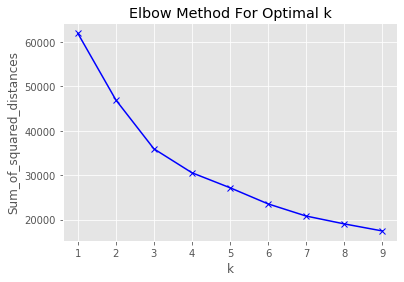

In [87]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# eksperimen

In [88]:
temp = final["Emotions"].values.tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(temp)

In [89]:
n_clusters = 3 #set k=6
km = KMeans(n_clusters=n_clusters, max_iter=10000, n_init=100, random_state=42).fit(X)
km

KMeans(max_iter=10000, n_clusters=3, n_init=100, random_state=42)

In [90]:
finaleks= final
finaleks['kmeans_cluster'] = km.labels_

In [91]:
for cluster in range(0,3):
    cek = final[final["kmeans_cluster"]==cluster]
    print("=======================")
    print("Cluster ", cluster+1)
    print(cek["Emotions"].unique())
    anger = 0
    disgust = 0
    joy = 0
    sadness = 0
    surprise = 0
    fear = 0
    for em in cek["Emotions"]:
        if bool(re.findall("anger", em)):
            anger += 1
        if bool(re.findall("disgust", em)):
            disgust += 1
        if bool(re.findall("joy", em)):
            joy += 1
        if bool(re.findall("sadness", em)):
            sadness += 1
        if bool(re.findall("surprise", em)):
            surprise += 1
        if bool(re.findall("fear", em)):
            fear += 1
        
    print("Jumlah anger: ", anger)
    print("Jumlah disgust: ", disgust)
    print("Jumlah joy: ", joy)
    print("Jumlah sadness: ", sadness)
    print("Jumlah surprise: ", surprise)
    print("Jumlah fear: ", fear)
    print("=======================")

Cluster  1
['joy  fear  anger  sadness ' 'disgust  joy  anger  sadness '
 'disgust  fear  joy  sadness '
 'joy  disgust  surprise  sadness  fear  anger '
 'joy  disgust  sadness  fear  anger '
 'joy  disgust  surprise  sadness  anger '
 'joy  disgust  surprise  fear  anger ' 'disgust  joy  anger '
 'joy  anger  disgust  sadness ' 'joy  surprise  sadness  fear  anger '
 'joy  disgust  surprise  sadness  fear ' 'disgust  fear  joy  anger '
 'joy  fear  anger  surprise ' 'disgust  joy  anger  surprise '
 'joy  fear  anger ' 'disgust  fear  joy ' 'joy  anger  disgust '
 'disgust  fear  joy  surprise ' 'disgust  fear  anger  sadness '
 'disgust  fear  anger  surprise ' 'disgust  fear  anger '
 'disgust  anger  sadness ' 'joy  anger  sadness  disgust '
 'disgust  surprise  sadness  fear  anger ' 'disgust  anger '
 'disgust  fear  surprise  sadness ' 'disgust  anger  surprise  sadness '
 'disgust  fear  sadness ' 'fear  anger  surprise  sadness '
 'fear  anger  surprise ' 'fear  anger  sadnes